# Bikes Assessment - Basic
This project was a part of **Data Science Specialization** by **E&ICT ACADEMY IIT ROORKEE** and [**CLOUDXLAB**](http://cloudxlab.com/). This project is a simplified (basic) version of "Bike Rental" project (without any data analysis step).
The objective of the project is to use historical usage patterns and weather data to forecast (predict) bike rental demand (number of bike users (‘cnt’)) on hourly basis.
We use the provided “Bikes Rental” data set to predict the bike demand (bike users count - 'cnt') using various best possible models (ML algorithms). Also, we report the model that performs best, fine-tune the same model using one of the model fine-tuning techniques and report the best possible combination of hyperparameters for the selected model. Lastly, we use the selected model to make final predictions and compare the predicted values with the actual values.

In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
import os

In [2]:
# Loading the data
filePath = r"C:\Users\Pranav Shetty\Downloads\bikes.csv"

bikesData = pd.read_csv(filePath)

In [3]:
bikesData

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [4]:
print(bikesData["dteday"])

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
17374    2012-12-31
17375    2012-12-31
17376    2012-12-31
17377    2012-12-31
17378    2012-12-31
Name: dteday, Length: 17379, dtype: object


In [5]:
bikesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
len(bikesData.columns)

17

In [7]:
bikesData["yr"].unique()

array([0, 1], dtype=int64)

In [8]:
bikesData.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


As we can see, the bikesData data set contains some features which may not be needed for this problem e.g.

1. **instant** - This is just an index holder.
2. **casual** - It contains the count of casual bike riders, which are already included in the overall users count i.e. 'cnt', hence not needed.
3. **registered** - It contains the registered bike riders, which again, like the casual riders, are already included in the overall -- users count i.e. 'cnt', hence not needed.
4. **atemp** - It is the 'feel' temperature, which may not be needed, as we already have 'temp' feature which contains temperature of the area - duplicate feature, hence not needed.
5. **dteday** - It is the Date. Since, our prediction is not based on the Date, its based on hour of the day, hence Date is not needed.

Since, these features are not needed for our current problem, let us drop them from the bikesData data set.

In [9]:
# Drop unnecessary columns

columnsToDrop = ["instant", "casual", "registered", "atemp", "dteday"]

bikesData.drop(columnsToDrop, axis = 1, inplace = True)

In [10]:
bikesData

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.56,0.1343,61


### Divide into training / test dataset
Now, since we have cleaned the **bikesData** data set, let us split it into **Training** and **Test** data sets into 70:30 ratio using scikit-learn's **train_test_split()** function.

Also, **train_test_split()** function uses 'Random Sampling', hence resulting **train_set** and **test_set** data sets have to be sorted by **dayCount**. Random Sampling may not be the best way to split the data, what other types of best Sampling method you can think of?

In [11]:
# split the data into train and test set... 70:30 ratio

from sklearn.model_selection import train_test_split

bikesData['dayCount'] = pd.Series(range(bikesData.shape[0]))/24

In [12]:
bikesData

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,16,0.000000
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,40,0.041667
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,32,0.083333
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,13,0.125000
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,1,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.60,0.1642,119,723.916667
17375,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,89,723.958333
17376,1,1,12,21,0,1,1,1,0.26,0.60,0.1642,90,724.000000
17377,1,1,12,22,0,1,1,1,0.26,0.56,0.1343,61,724.041667


In [13]:
np.random.seed(42)

train_set, test_set = train_test_split(bikesData, test_size=0.3, random_state=42)

In [14]:
train_set.sort_values('dayCount', axis= 0, inplace=True) 
test_set.sort_values('dayCount', axis= 0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
print(len(train_set))

12165


In [16]:
print(len(test_set))

5214


In [17]:
# This function is used to calculate the basics stats of observed scores from cross-validation of models.
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### Cleaning the data - Feature Scaling
Few of the features of bikesData data set may need **Scaling**. For example, if we see the values of features - **temp**, **hum** and **windspeed** - their values are in different scales (ranges), hence, we need to apply Scaling to these features values for our ML algorithms to work fine on them.

In [18]:
# feature scaling... different units of features to comparable values..

columnsToScale = ["temp", "hum", "windspeed"]

In [19]:
scaler = preprocessing.StandardScaler()

In [21]:
train_set[columnsToScale] = scaler.fit_transform(train_set[columnsToScale])

test_set[columnsToScale] = scaler.transform(test_set[columnsToScale])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [22]:
train_set.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,1.216500e+04,1.216500e+04,1.216500e+04,12165.000000,12165.000000
mean,2.510399,0.501767,6.562351,11.579038,0.027949,3.004603,0.681381,1.426634,1.658955e-15,-2.594171e-17,-1.560153e-15,191.237649,362.552038
std,1.105498,0.500017,3.430356,6.925790,0.164834,2.010245,0.465960,0.639961,1.000041e+00,1.000041e+00,1.000041e+00,182.900931,209.592847
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.476000e+00,-3.245965e+00,-1.552670e+00,1.000000,0.041667
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,-8.186290e-01,-7.628859e-01,-6.962541e-01,40.000000,181.333333
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,1.005628e-02,1.307622e-02,-2.069907e-01,145.000000,361.791667
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,8.387416e-01,8.407692e-01,5.264946e-01,282.000000,545.333333
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,2.599698e+00,1.927116e+00,5.419128e+00,976.000000,724.083333


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [26]:
# from xgboost.sklearn import XGBRegressor

We need to create **target** data set, and also, we need to create a final 'Training' data set by dropping the **target** label from the existing 'Training' data set (train_set).

In [27]:
trainingCols = train_set.drop("cnt" , axis = 1)

In [28]:
trainingLabels = train_set["cnt"]

In [29]:
trainingLabels

1         40
2         32
4          1
6          2
7          3
        ... 
17372    164
17373    122
17374    119
17376     90
17378     49
Name: cnt, Length: 12165, dtype: int64

### Train and Analyze the Models - Train DecisionTree Model
We train the Decision Tree Model on the 'Training' data set using cross-validation and calculate 'mean absolute error' and 'root mean squared error' (RMSE) for this model.

We display these scores using display_scores() function.

In [30]:
dec_reg = DecisionTreeRegressor(random_state=42)

In [31]:
dt_mse_scores = -cross_val_score(dec_reg, trainingCols, trainingLabels,
                         scoring="neg_mean_absolute_error", cv=10)
display_scores(dt_mse_scores)

Scores: [42.94494659 50.37222679 36.95891537 44.26211997 46.99589154 71.98026316
 58.19901316 48.87417763 50.84868421 96.46217105]
Mean: 54.7898409457034
Standard deviation: 16.563759407187572


### Train Linear Regression Model
Train the Linear Regression Model on the 'Training' data set using cross-validation and calculate 'mean absolute error' and 'root mean squared error' (RMSE) for this model.

Display these scores using display_scores() function.

In [32]:
lin_reg = LinearRegression()

#trainingCols.describe()
#trainingLabels.describe()

lr_mae_scores = -cross_val_score(lin_reg, trainingCols, trainingLabels,
scoring = "neg_mean_absolute_error", cv=10)

display_scores(lr_mae_scores)

lr_mse_scores = np.sqrt(-cross_val_score(lin_reg, trainingCols, trainingLabels,
scoring = "neg_mean_squared_error", cv=10))

display_scores(lr_mse_scores)

Scores: [ 66.96340699  80.48809095 113.84704981  93.17230086  76.11197672
  96.5220689  133.13798218 158.02254734 158.90195479 127.15674717]
Mean: 110.4324125694229
Standard deviation: 31.426965705295345
Scores: [ 84.63836676 111.12038541 131.88324414 119.16350622 105.17621319
 127.72562924 174.97188817 187.31691741 205.60028279 164.30585678]
Mean: 141.19022901181796
Standard deviation: 37.55565075919503


### Train Random Forest Model
Train the Random Forest Model on the 'Training' data set using cross validation and calculate 'mean absolute error' and 'root mean squared error' (RMSE) for this model.

Display these scores using display_scores() function.

In [33]:
forest_reg = RandomForestRegressor(n_estimators=150, random_state=42)

rf_mae_scores = -cross_val_score(forest_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")

display_scores(rf_mae_scores)

rf_mse_scores = np.sqrt(-cross_val_score(forest_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))

display_scores(rf_mse_scores)

Scores: [33.39666393 33.54451931 28.50225692 31.78826623 36.55658724 57.81963268
 40.96405702 40.84652961 37.57766447 84.69771382]
Mean: 42.56938912059061
Standard deviation: 15.980256848600963
Scores: [ 45.64176074  50.97205843  43.37588352  52.2640926   60.46557726
  94.24478873  66.26045287  65.45672124  61.69916554 131.9727285 ]
Mean: 67.23532294382946
Standard deviation: 25.544513111074128


### Fine-Tuning the Selected Model - Choosing set of hyperparameter combinations for Grid Search
Now, since we have "Trained" the models and selected the best model based on the performance measure(RMSE) values, let us apply Grid Search on this selected model to fine-tune the model (i.e. find the best hyperparameters for this model).

As first step for the same, let us import GridSearchCV and choose the set of hyperparameter combinations in the form of a 'parameter grid', which we will use to apply the Grid Search.

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = [
    {'n_estimators': [120, 150], 'max_features': [10, 12], 
     'max_depth': [15, 28]}
]

In [36]:
# instantiate the GridSearchCV class by passing to it the selected model and other required parameters.
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring = 
             "neg_mean_squared_error")

In [37]:
# run the GridSearchCV to get the Best Estimator and the Best Parameters
grid_search.fit(trainingCols, trainingLabels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=150, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [38]:
print(grid_search.best_params_)

{'max_depth': 28, 'max_features': 10, 'n_estimators': 150}


In [39]:
print(grid_search.best_estimator_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=28, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)


### Fine-Tuning the Selected Model - Knowing Feature Importances
Now, since we have applied the Grid Search on the selected model and got the 'best estimator' and 'best parameters', let us find the importance scores of each of the features of the Training dataset.

In [40]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [41]:
print(feature_importances)

[0.00424888 0.00145493 0.00570279 0.58348648 0.00215107 0.01790669
 0.06993018 0.01688336 0.09373438 0.03176755 0.00907719 0.16365649]


### Evaluate the model on test - Preparing to test the final model on Test dataset
Now, since, we got the best (final) model (using Grid Search) for this problem, let us use the same on the 'Test' data set to predict the 'cnt' values and then compare the predicted values to the actual values.

In [42]:
final_model = grid_search.best_estimator_

In [43]:
test_set.sort_values("dayCount", axis = 0, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
test_x_cols = (test_set.drop("cnt", axis=1)).columns.values

In [45]:
test_y_cols = 'cnt'

In [46]:
X_test = test_set.loc[:,test_x_cols]

In [47]:
y_test = test_set.loc[:,test_y_cols]

### Evaluate the model on test - Make Predictions on the Test dataset using Final Model
Let us use the Final Model to make predictions on the 'Test' data set and calculate the RMSE. Then compare the predicted values to the actual values.

In [48]:
test_set.loc[:,"predictedCounts_test"] = final_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [49]:
mse = mean_squared_error(y_test, test_set.loc[:,'predictedCounts_test'])

In [50]:
final_mse = np.sqrt(mse)

In [51]:
print(final_mse)

39.47930005837265


In [52]:
test_set

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount,predictedCounts_test
0,1,0,1,0,0,6,0,1,-1.336557,0.944231,-1.552670,16,0.000000,35.973333
3,1,0,1,3,0,6,0,1,-1.336557,0.633846,-1.552670,13,0.125000,10.873333
5,1,0,1,5,0,6,0,2,-1.336557,0.633846,-0.818365,1,0.208333,4.680000
8,1,0,1,8,0,6,0,1,-1.336557,0.633846,-1.552670,8,0.333333,21.013333
14,1,0,1,14,0,6,0,2,-0.197115,0.478654,0.771536,106,0.583333,120.186667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17354,1,1,12,23,0,0,0,1,-1.543729,-0.607694,0.282273,49,723.083333,39.900000
17355,1,1,12,0,0,1,1,1,-1.647314,-0.400770,0.037231,34,723.125000,40.466667
17367,1,1,12,12,0,1,1,2,-1.336557,-0.349039,0.037231,224,723.625000,172.146667
17375,1,1,12,20,0,1,1,2,-1.232972,-0.142116,-0.206991,89,723.958333,96.440000


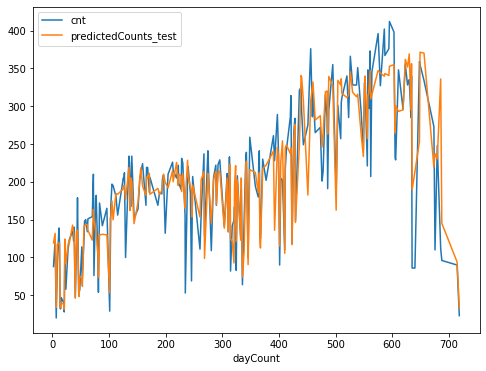

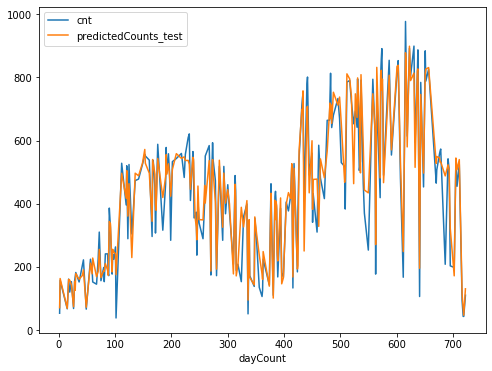

In [53]:
# plot the predicted values v/s actual values
times = [9,18]
for time in times:
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()
    test_set_freg_time = test_set[test_set.hr == time]
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'cnt', ax = ax)
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'predictedCounts_test', ax =ax)
    plt.show()